In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

In [6]:
file_path = "credit-worthiness-prediction/train.csv"

In [7]:
data = pd.read_csv(file_path)

data.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [8]:
data.isnull().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [21]:
# Replace '3+' with 3 and convert to integer
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)

data['Dependents'].unique()
data['Dependents'].dtype

dtype('int32')

In [22]:
X = data.drop(['ID', 'Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [05:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.8127118644067797

Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.02      0.03       197
           1       0.83      0.97      0.90       983

    accuracy                           0.81      1180
   macro avg       0.47      0.49      0.46      1180
weighted avg       0.71      0.81      0.75      1180



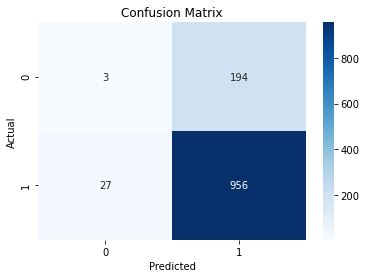

In [25]:
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss'),
                           param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [27]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

Tuned Model Accuracy: 0.8330508474576271


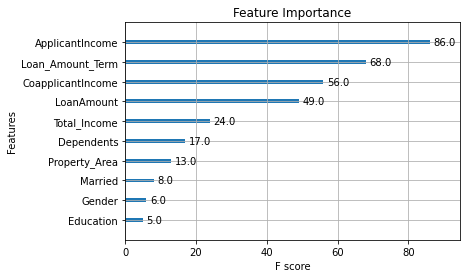

In [28]:
xgb.plot_importance(best_model, max_num_features=10)
plt.title("Feature Importance")
plt.show()

In [30]:
test_file_path = "credit-worthiness-prediction/test.csv"

In [31]:
test_data = pd.read_csv(test_file_path)

In [33]:
test_data.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [38]:
test_data.isnull().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Total_Income         0
dtype: int64

In [41]:
test_data['Dependents'] = test_data['Dependents'].replace('3+', 3).astype(int)
test_data['Dependents'].unique()

array([0, 1, 3, 2])

In [44]:
test_X_test = test_data.drop(['ID', 'Loan_ID'], axis=1)
# test_y_test = test_data['Loan_status']

In [45]:
test_pred = best_model.predict(test_X_test)

In [47]:
# Make predictions
test_y_pred = best_model.predict(test_X_test)

In [48]:
# Add predictions to the test dataset
test_data['Loan_Status_Predicted'] = test_y_pred

In [50]:
test_data.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status_Predicted
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000,1
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000,1
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000,1
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000,1
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750,1


In [51]:
# Export the test dataset with predictions
test_data.to_csv('test_predictions.csv', index=False)